# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [ ]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [ ]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [ ]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8


In [17]:
'''!pip install pyunpack
!pip install patool'''

'!pip install pyunpack\n!pip install patool'

In [2]:
'''from pyunpack import Archive
Archive('archive.zip').extractall('')'''

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# to ignore all the warnings which come from tensorflow.

In [2]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pathlib
from keras_preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
%load_ext tensorboard


In [4]:
%tensorboard --logdir logs

In [3]:
df=pd.read_csv('labels_final.csv',dtype=str)
df.head(10)

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7
5,imagesw/w/u/d/wud95a00/500116895+-6898.tif,4
6,imagesg/g/v/x/gvx25c00/2505142251_2252.tif,1
7,imagese/e/r/m/erm31f00/0001442842.tif,7
8,imagesp/p/e/v/pev40e00/03371370.tif,13
9,imagesi/i/w/i/iwi42d00/2020355073.tif,5


In [20]:
'''!pip install git+https://github.com/keras-team/keras-preprocessing.git
'''

'!pip install git+https://github.com/keras-team/keras-preprocessing.git\n'

In [4]:
train_data,test_data=train_test_split(df,test_size=0.2, stratify=df['label'])

In [6]:
direc='data_final'
data_root = pathlib.Path(direc)
print((data_root))

data_final


In [7]:
list(data_root.iterdir())

[PosixPath('data_final/imagesa'),
 PosixPath('data_final/imagesc'),
 PosixPath('data_final/imagese'),
 PosixPath('data_final/imagesi'),
 PosixPath('data_final/imagesu'),
 PosixPath('data_final/imagesj'),
 PosixPath('data_final/imagesp'),
 PosixPath('data_final/imagesw'),
 PosixPath('data_final/imagesn'),
 PosixPath('data_final/imagesd'),
 PosixPath('data_final/imagesy'),
 PosixPath('data_final/imagesz'),
 PosixPath('data_final/imagesk'),
 PosixPath('data_final/imagesv'),
 PosixPath('data_final/imagest'),
 PosixPath('data_final/imagesb'),
 PosixPath('data_final/imagesh'),
 PosixPath('data_final/imagesq'),
 PosixPath('data_final/imagesf'),
 PosixPath('data_final/imagesx'),
 PosixPath('data_final/imagesr'),
 PosixPath('data_final/imagesl'),
 PosixPath('data_final/imageso'),
 PosixPath('data_final/imagesg'),
 PosixPath('data_final/imagesm')]

In [8]:
(list(tqdm(data_root.glob('*/*/*/*/*'))))

48000it [00:07, 6706.06it/s]


[PosixPath('data_final/imagesa/a/q/q/aqq18e00'),
 PosixPath('data_final/imagesa/a/q/z/aqz44e00'),
 PosixPath('data_final/imagesa/a/q/z/aqz92e00'),
 PosixPath('data_final/imagesa/a/q/f/aqf73e00'),
 PosixPath('data_final/imagesa/a/q/f/aqf26d00'),
 PosixPath('data_final/imagesa/a/q/r/aqr09d00'),
 PosixPath('data_final/imagesa/a/q/r/aqr07d00'),
 PosixPath('data_final/imagesa/a/q/r/aqr36e00'),
 PosixPath('data_final/imagesa/a/q/a/aqa03d00'),
 PosixPath('data_final/imagesa/a/q/a/aqa46d00'),
 PosixPath('data_final/imagesa/a/q/g/aqg19d00'),
 PosixPath('data_final/imagesa/a/q/g/aqg46d00'),
 PosixPath('data_final/imagesa/a/q/g/aqg49c00'),
 PosixPath('data_final/imagesa/a/q/g/aqg71a00'),
 PosixPath('data_final/imagesa/a/q/x/aqx22d00'),
 PosixPath('data_final/imagesa/a/q/x/aqx28e00'),
 PosixPath('data_final/imagesa/a/q/l/aql59e00'),
 PosixPath('data_final/imagesa/a/q/l/aql61e00'),
 PosixPath('data_final/imagesa/a/q/l/aql55a00'),
 PosixPath('data_final/imagesa/a/q/u/aqu64d00'),
 PosixPath('data_fin

In [9]:
len(list(data_root.glob('*/*/*/*/*')))
#There are 48000 images

48000

In [5]:
data_gen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255.)
#, rotation_range=[0,180],brightness_range=[0,1],shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True

In [6]:
print(train_data.shape)
print(test_data.shape)

(38400, 2)
(9600, 2)


In [7]:
training_generator=data_gen.flow_from_dataframe(dataframe=train_data, 
                                               directory='data_final/',
                                               x_col='path',
                                               y_col='label',
                                               subset="training",
                                               batch_size=128,seed=42,shuffle=True,class_mode="categorical")

Found 30720 validated image filenames belonging to 16 classes.


In [8]:

cv_generator=data_gen.flow_from_dataframe(dataframe=train_data, 
                                               directory='data_final/',
                                               x_col='path',
                                               y_col='label',
                                               subset="validation",
                                               batch_size=128,seed=42,shuffle=True,class_mode="categorical")


Found 7680 validated image filenames belonging to 16 classes.


In [9]:
test_generator=test_datagen.flow_from_dataframe(dataframe=test_data, 
                                               directory='data_final/',
                                               x_col='path',
                                               y_col='label',
                                               batch_size=1,class_mode='categorical')

Found 9600 validated image filenames belonging to 16 classes.




3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [10]:
base_model=VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
base_model.trainable=False

#creating a input layer
Input=tf.keras.Input(shape=(256,256,3))#i[0].shape
Input1=base_model(Input)
Input1=tf.keras.layers.Conv2D(32,(3,3),(1,1),activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(14))(Input1)
Input1=tf.keras.layers.MaxPool2D()(Input1)
Input1=tf.keras.layers.Dense(40,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(1))(Input1)
Input1=tf.keras.layers.Dense(20,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(1))(Input1)
Input1=tf.keras.layers.Flatten()(Input1)
output=tf.keras.layers.Dense(16,activation='softmax')(Input1)

model=tf.keras.Model(inputs=Input,outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 32)          147488    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dense (Dense)               (None, 3, 3, 40)          1320      
                                                                 
 dense_1 (Dense)             (None, 3, 3, 20)          820       
                                                             

In [11]:
model.load_weights('models/best_model_1.h5')

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_accuracy',min_delta=0.001)

logs='logs/model_1'
check_point_folder='models/best_model_1.h5'

check_point= tf.keras.callbacks.ModelCheckpoint(check_point_folder,monitor='val_loss',save_weights_only=True)


tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)

model.fit(training_generator,epochs=50, validation_data=cv_generator, callbacks=[early_stopping,tensorboard,check_point], verbose=1)

Epoch 1/50
240/240 [==============================] - 380s 2s/step - loss: 1.7021 - accuracy: 0.4788 - val_loss: 1.3519 - val_accuracy: 0.5826
Epoch 2/50
240/240 [==============================] - 383s 2s/step - loss: 1.2071 - accuracy: 0.6325 - val_loss: 1.1606 - val_accuracy: 0.6475
Epoch 3/50
240/240 [==============================] - 399s 2s/step - loss: 1.0522 - accuracy: 0.6843 - val_loss: 1.0992 - val_accuracy: 0.6678
Epoch 4/50
240/240 [==============================] - 394s 2s/step - loss: 0.9511 - accuracy: 0.7133 - val_loss: 1.0674 - val_accuracy: 0.6812
Epoch 5/50
240/240 [==============================] - 379s 2s/step - loss: 0.8810 - accuracy: 0.7326 - val_loss: 1.0877 - val_accuracy: 0.6796
Epoch 6/50
240/240 [==============================] - 373s 2s/step - loss: 0.8221 - accuracy: 0.7533 - val_loss: 1.0323 - val_accuracy: 0.6939
Epoch 7/50
240/240 [==============================] - 379s 2s/step - loss: 0.7615 - accuracy: 0.7692 - val_loss: 1.0490 - val_accuracy: 0.6878

In [51]:
model.evaluate(test_generator)

9600/9600 [==============================] - 444s 46ms/step - loss: 1.0456 - accuracy: 0.6938


[1.045638918876648, 0.6937500238418579]

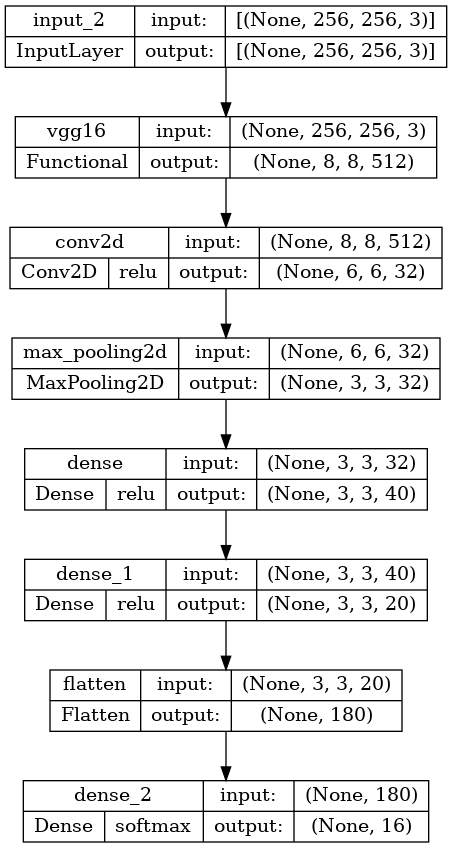

In [14]:
tf.keras.utils.plot_model(model,to_file='model_1.png',show_shapes=True,
    show_layer_activations=True)

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [15]:
base_model=VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
base_model.trainable=False

#8, 8, 512
#creating a input layer
Input=tf.keras.Input(shape=(256,256,3))
Input1=base_model(Input)
Input1=tf.keras.layers.Conv2D(512,(8, 8),(1,1),activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(14))(Input1)
Input1=tf.keras.layers.Conv2D(512,(1,1),(1,1),activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(14))(Input1)
Input1=tf.keras.layers.Flatten()(Input1)
output=tf.keras.layers.Dense(16,activation='softmax')(Input1)

model_2=tf.keras.Model(inputs=Input,outputs=output)

model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 512)         16777728  
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 512)         262656    
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                8208      
                                                                 
Total params: 31,763,280
Trainable params: 17,048,592
Non-t

In [42]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=1,monitor='val_accuracy',min_delta=0.001)

logs='logs/model_2'
check_point_folder='models/best_model_2.h5'

check_point= tf.keras.callbacks.ModelCheckpoint(check_point_folder,monitor='val_loss',save_weights_only=True)


tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)

model_2.fit(training_generator,epochs=50, validation_data=cv_generator, callbacks=[early_stopping,tensorboard,check_point], verbose=1)

Epoch 1/50
240/240 [==============================] - 550s 2s/step - loss: 1.5048 - accuracy: 0.5859 - val_loss: 1.0814 - val_accuracy: 0.6721
Epoch 2/50
240/240 [==============================] - 382s 2s/step - loss: 0.8615 - accuracy: 0.7365 - val_loss: 0.8898 - val_accuracy: 0.7327
Epoch 3/50
240/240 [==============================] - 385s 2s/step - loss: 0.6840 - accuracy: 0.7879 - val_loss: 0.9397 - val_accuracy: 0.7250


In [52]:
model_2.evaluate(test_generator)

9600/9600 [==============================] - 539s 56ms/step - loss: 0.9286 - accuracy: 0.7274


[0.9286423921585083, 0.7273958325386047]

In [16]:
model_2.load_weights('models/best_model_2.h5')

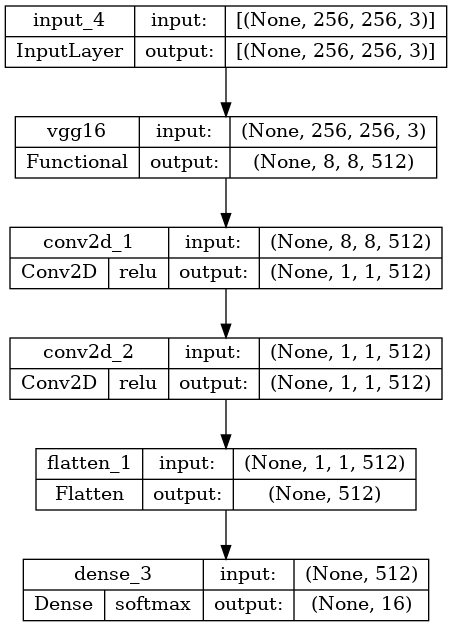

In [17]:
tf.keras.utils.plot_model(model_2,to_file='model_2.png',show_shapes=True,
    show_layer_activations=True)

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [19]:
base_model=VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
for layers in base_model.layers[:-6]:
    layers.trainable=False

for i, layer  in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_10 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [20]:
base_model=VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
for layers in base_model.layers[:-6]:
    layers.trainable=False

Input=tf.keras.Input(shape=(256,256,3))
Input1=base_model(Input)
Input1=tf.keras.layers.Conv2D(512,(8, 8),(1,1),activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(14))(Input1)
Input1=tf.keras.layers.Conv2D(512,(1,1),(1,1),activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(14))(Input1)
Input1=tf.keras.layers.Flatten()(Input1)
output=tf.keras.layers.Dense(16,activation='softmax')(Input1)

model_3=tf.keras.Model(inputs=Input,outputs=output)

model_3.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 1, 512)         16777728  
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 512)         262656    
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 16)                8208      
                                                                 
Total params: 31,763,280
Trainable params: 26,487,824
Non-t

In [21]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(0.0004), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',min_delta=0.001)

logs='logs/model_3'
check_point_folder='models/best_model_3.h5'

check_point= tf.keras.callbacks.ModelCheckpoint(check_point_folder,monitor='val_loss',save_weights_only=True)

#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay
tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)

model_3.fit(training_generator,epochs=50, validation_data=cv_generator, callbacks=[early_stopping,tensorboard,check_point], verbose=1)

Epoch 1/50
240/240 [==============================] - 458s 2s/step - loss: 1.6606 - accuracy: 0.4799 - val_loss: 1.2203 - val_accuracy: 0.6271
Epoch 2/50
240/240 [==============================] - 443s 2s/step - loss: 1.0078 - accuracy: 0.6881 - val_loss: 0.9284 - val_accuracy: 0.7177
Epoch 3/50
240/240 [==============================] - 511s 2s/step - loss: 0.7856 - accuracy: 0.7577 - val_loss: 0.8435 - val_accuracy: 0.7458
Epoch 4/50
240/240 [==============================] - 442s 2s/step - loss: 0.6564 - accuracy: 0.7974 - val_loss: 0.8105 - val_accuracy: 0.7540
Epoch 5/50
240/240 [==============================] - 440s 2s/step - loss: 0.5374 - accuracy: 0.8326 - val_loss: 0.8300 - val_accuracy: 0.7595
Epoch 6/50
240/240 [==============================] - 503s 2s/step - loss: 0.4246 - accuracy: 0.8668 - val_loss: 0.8539 - val_accuracy: 0.7648
Epoch 7/50
240/240 [==============================] - 450s 2s/step - loss: 0.3420 - accuracy: 0.8886 - val_loss: 0.9059 - val_accuracy: 0.7711

In [22]:
model_3.evaluate(test_generator)

9600/9600 [==============================] - 547s 57ms/step - loss: 0.8765 - accuracy: 0.7743


[0.8765419721603394, 0.7742708325386047]

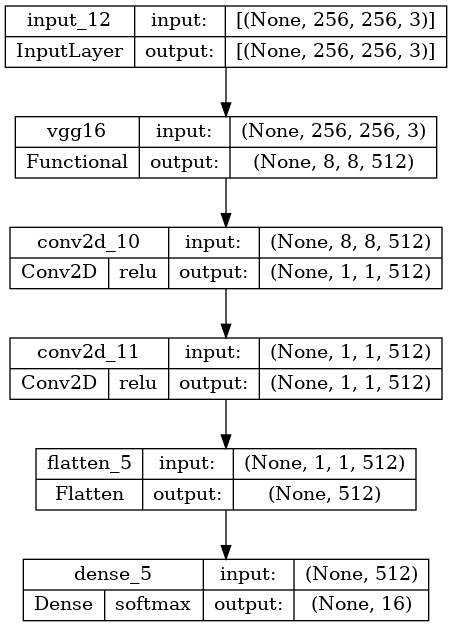

In [23]:
tf.keras.utils.plot_model(model_3,to_file='model_3.png',show_shapes=True,
    show_layer_activations=True)

### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3